In [1]:
# Datawrangling and Dataanlysis and visulization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machinelearning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
testing = pd.read_csv('test.csv')
training= pd.read_csv('train.csv')

In [3]:
testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
combine = [testing, training]

In [6]:
print(training.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
training.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
training = training.drop(['Ticket','Cabin', 'Embarked','Name', 'PassengerId', 'Fare'], axis=1)
training=training.dropna()

In [10]:
training

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [11]:
training.info()
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Text(0.5, 1.0, '(1 = Survived, Survival Distribution)')

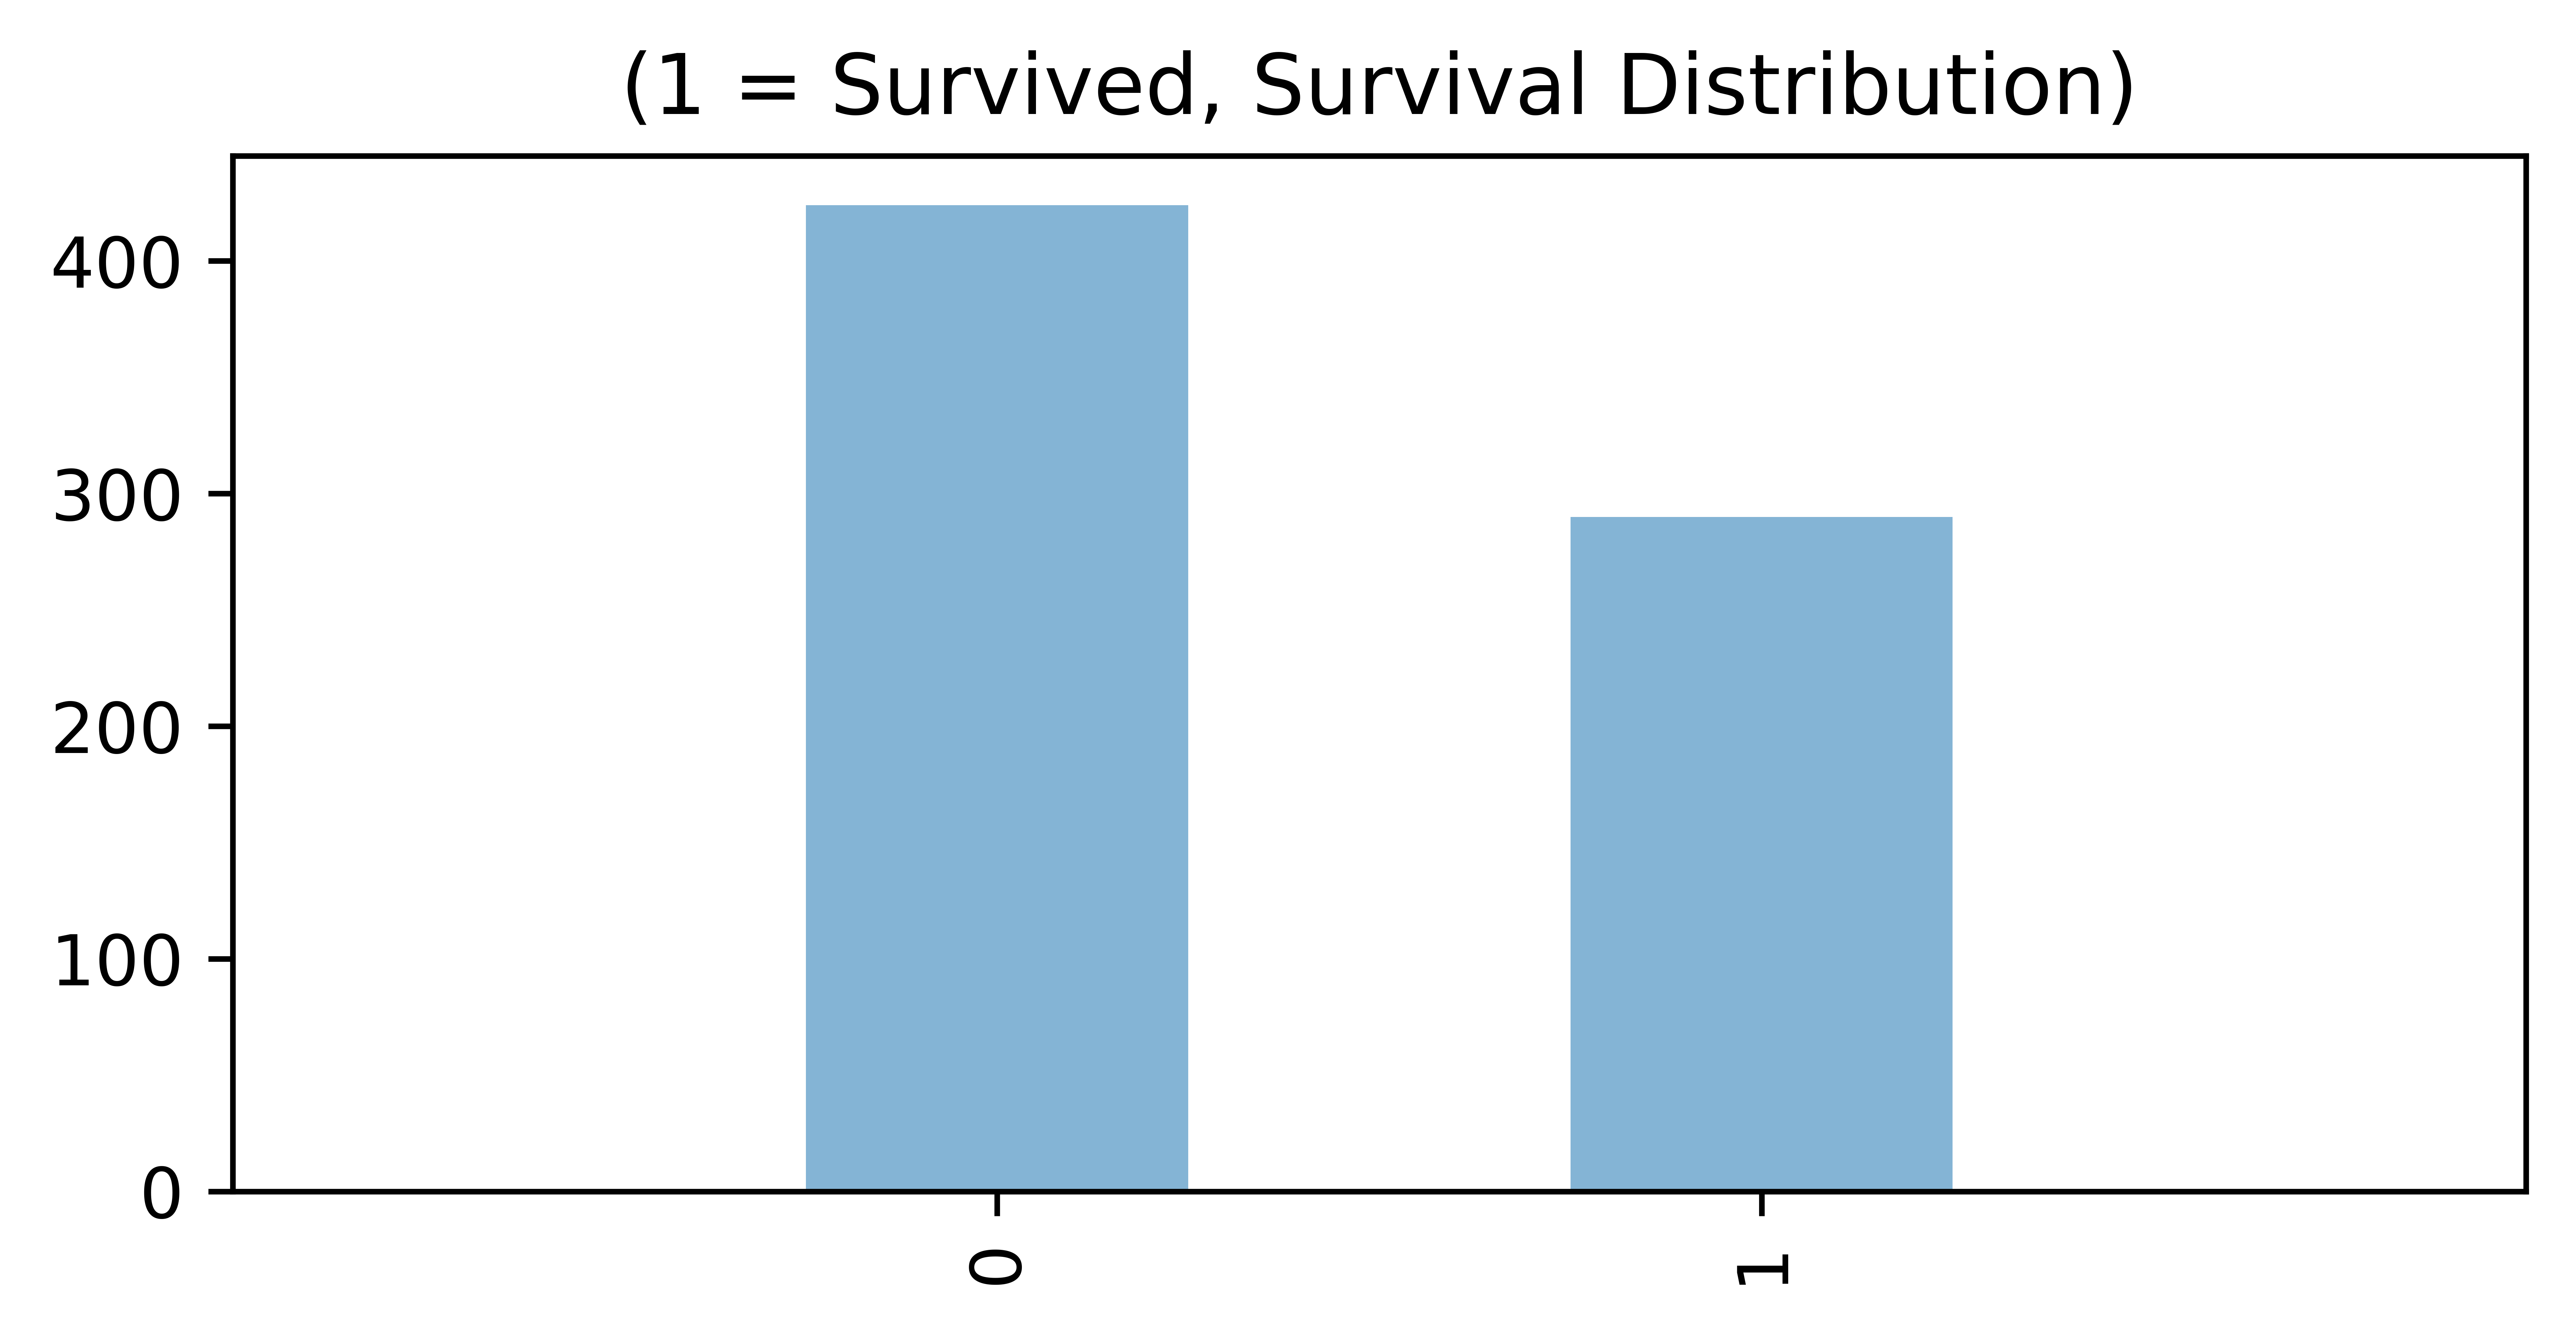

In [12]:
fig = plt.figure(figsize=(20,6), dpi=1500)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart=0.55

ax1 = plt.subplot2grid((2,3), (0,0))
training.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1,2)
plt.title("(1 = Survived, Survival Distribution)")


Text(0.5, 1.0, 'Class Survival')

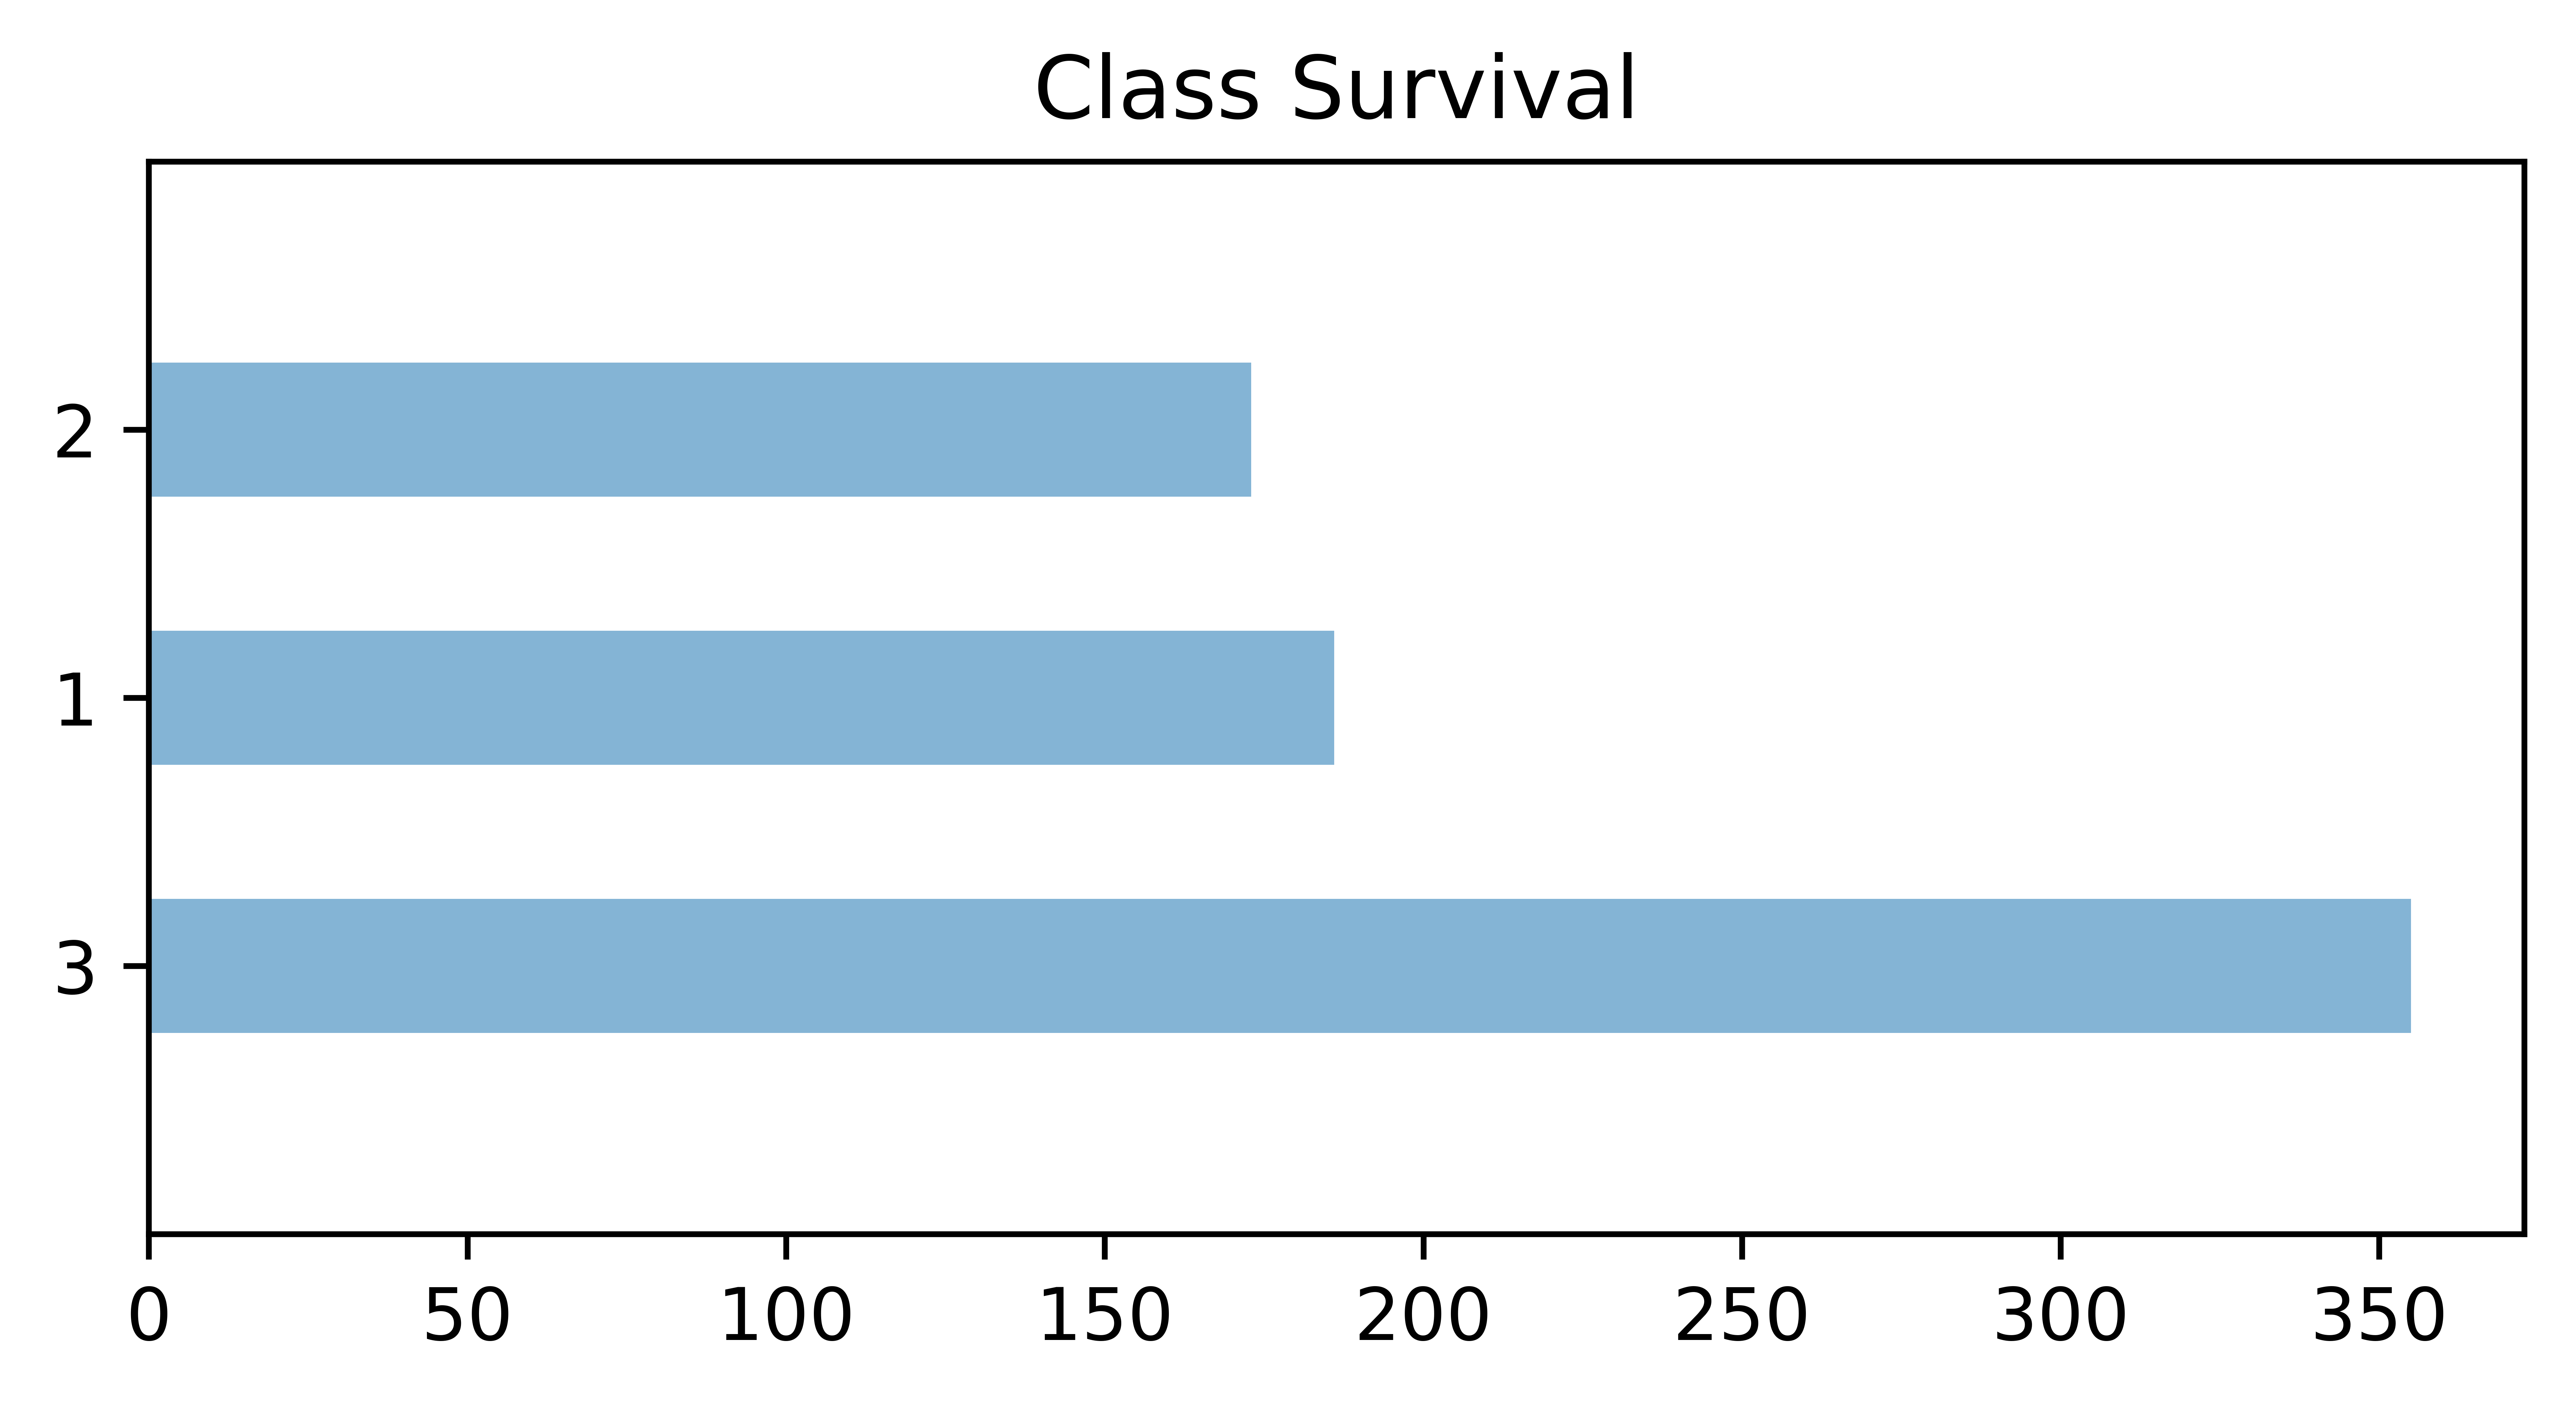

In [13]:
fig = plt.figure(figsize=(20,6), dpi=1500)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart=0.55
ax2 = plt.subplot2grid((2,3), (0,2))
training.Pclass.value_counts().plot(kind='barh', alpha=alpha_bar_chart)
ax2.set_ylim(-1, len(training.Pclass.value_counts()))
plt.title("Class Survival")

In [14]:
training[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.754789
1,male,0.205298


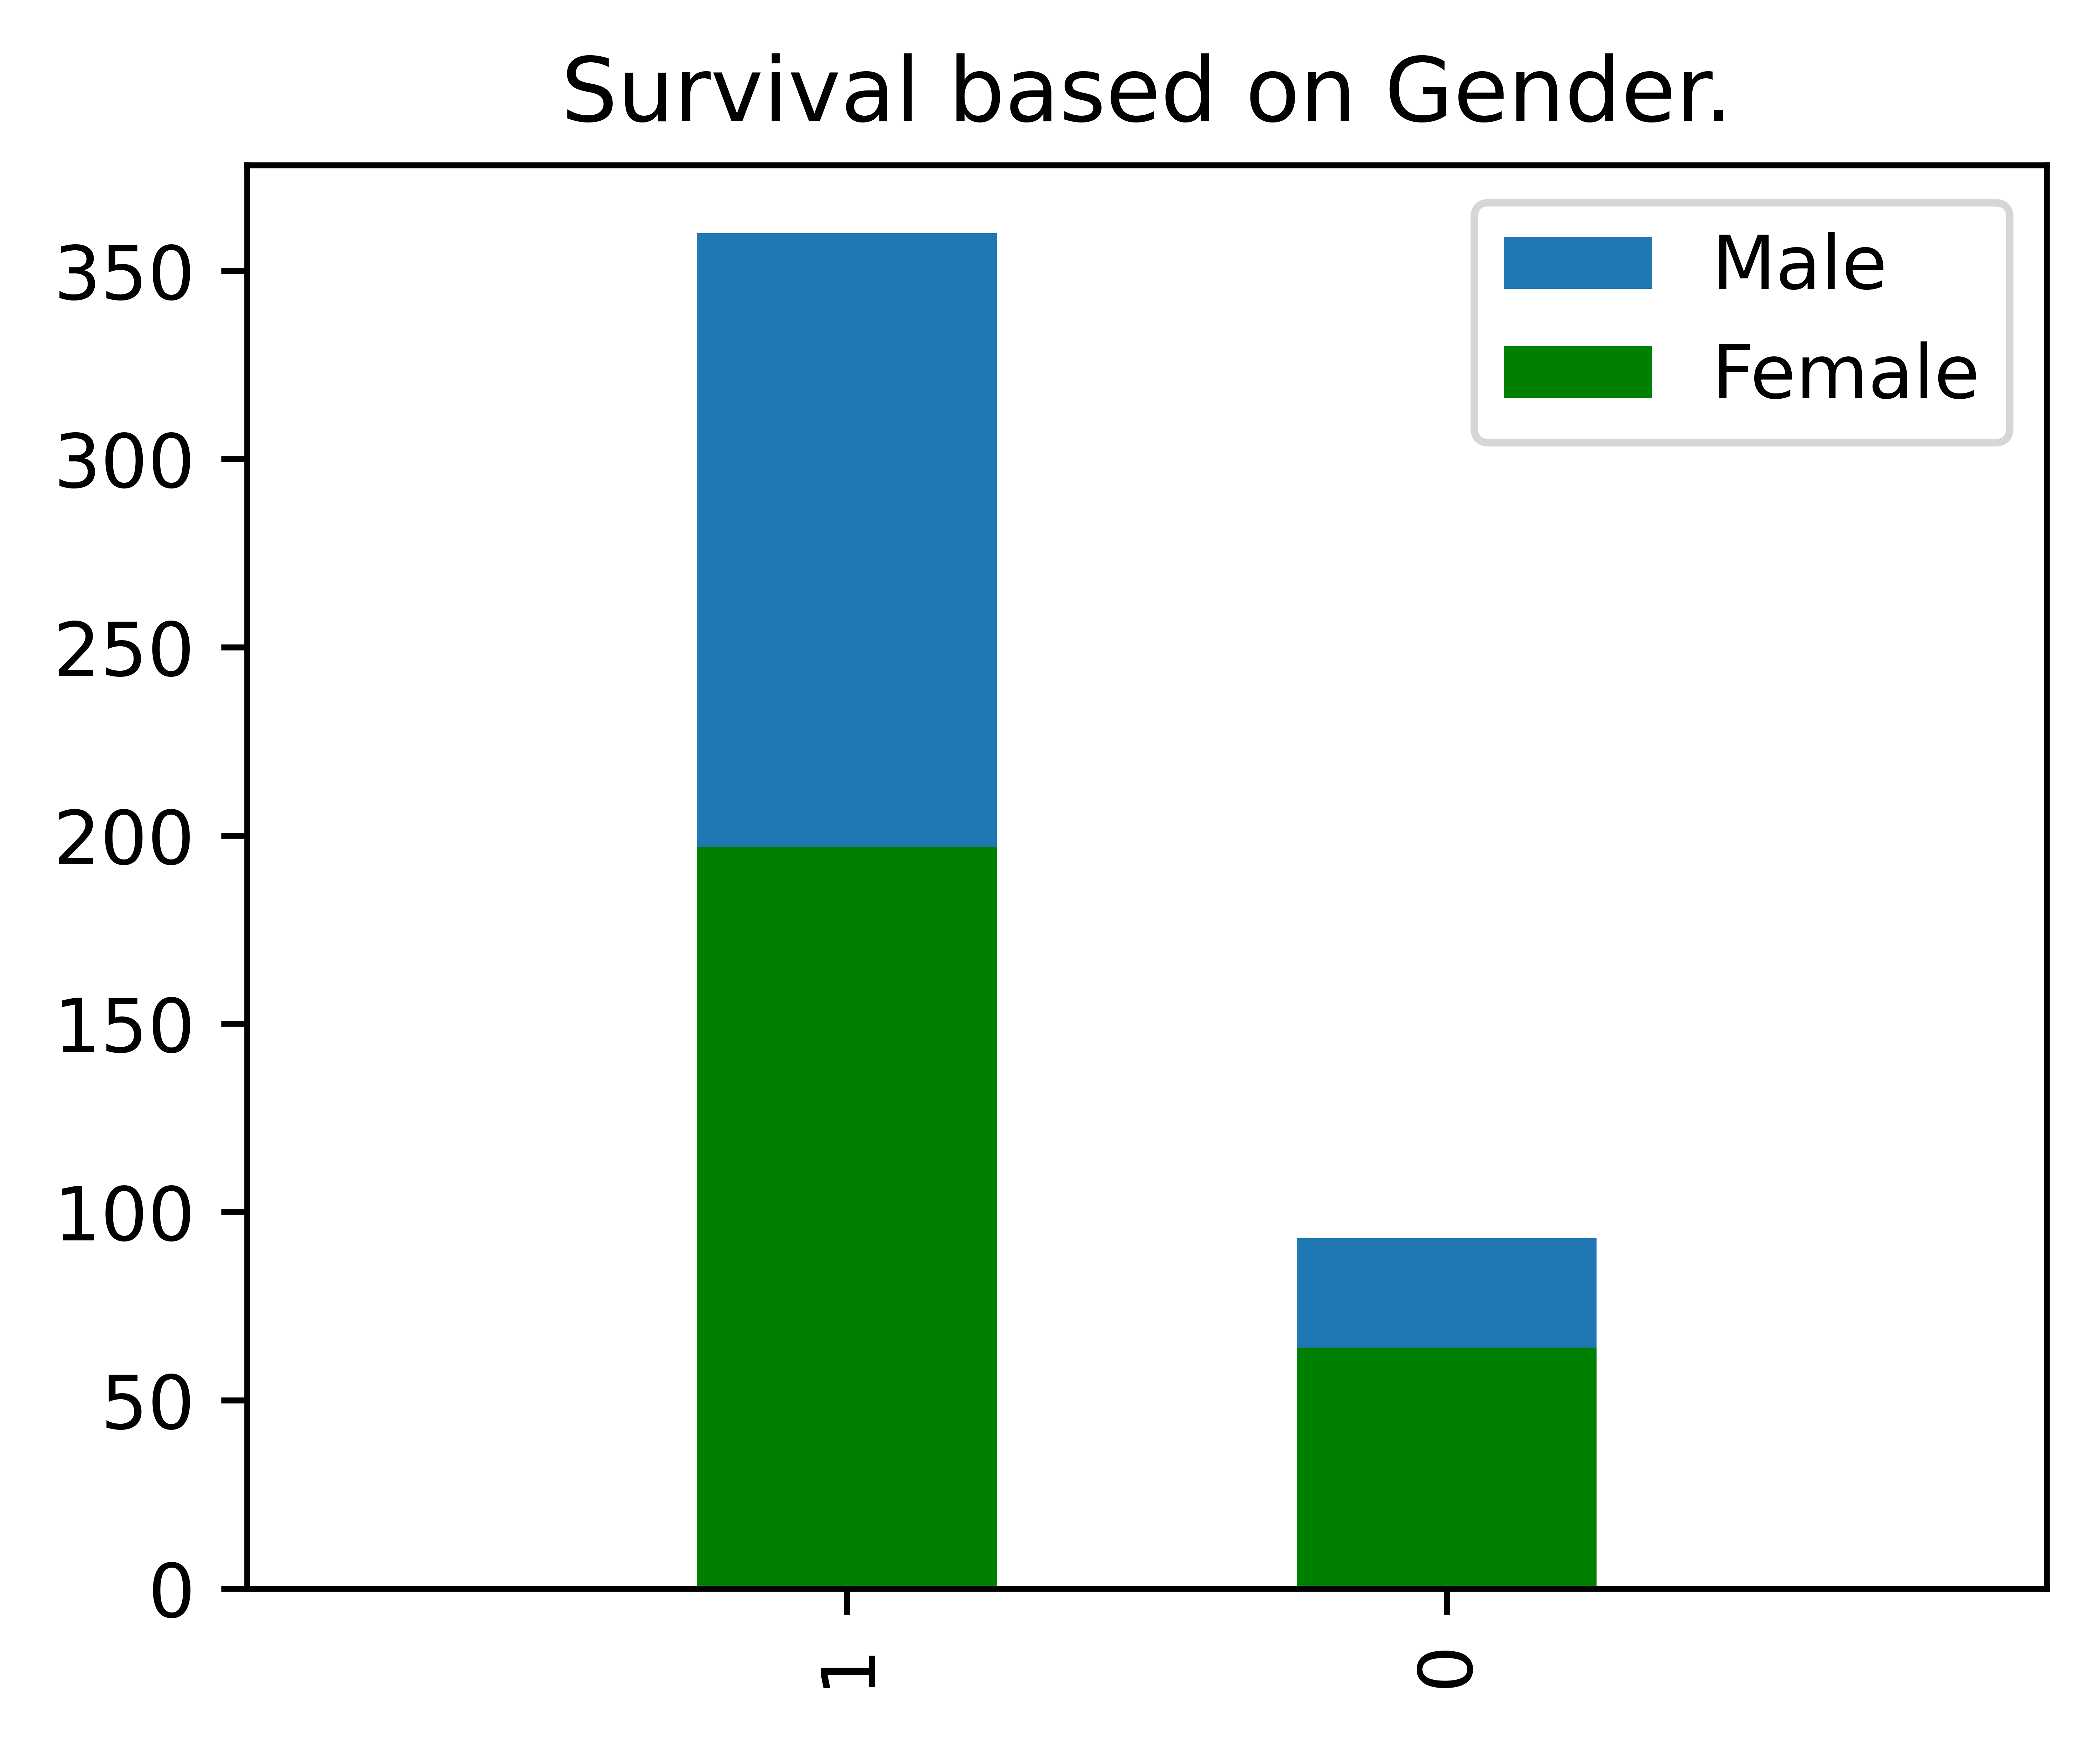

In [15]:
fig = plt.figure(figsize=(20,12), dpi=1500)
a = 0.65

ax2 = fig.add_subplot(345)
training.Survived[training.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
training.Survived[training.Sex == 'female'].value_counts().plot(kind='bar', color='green',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Survival based on Gender."); plt.legend(loc='best')



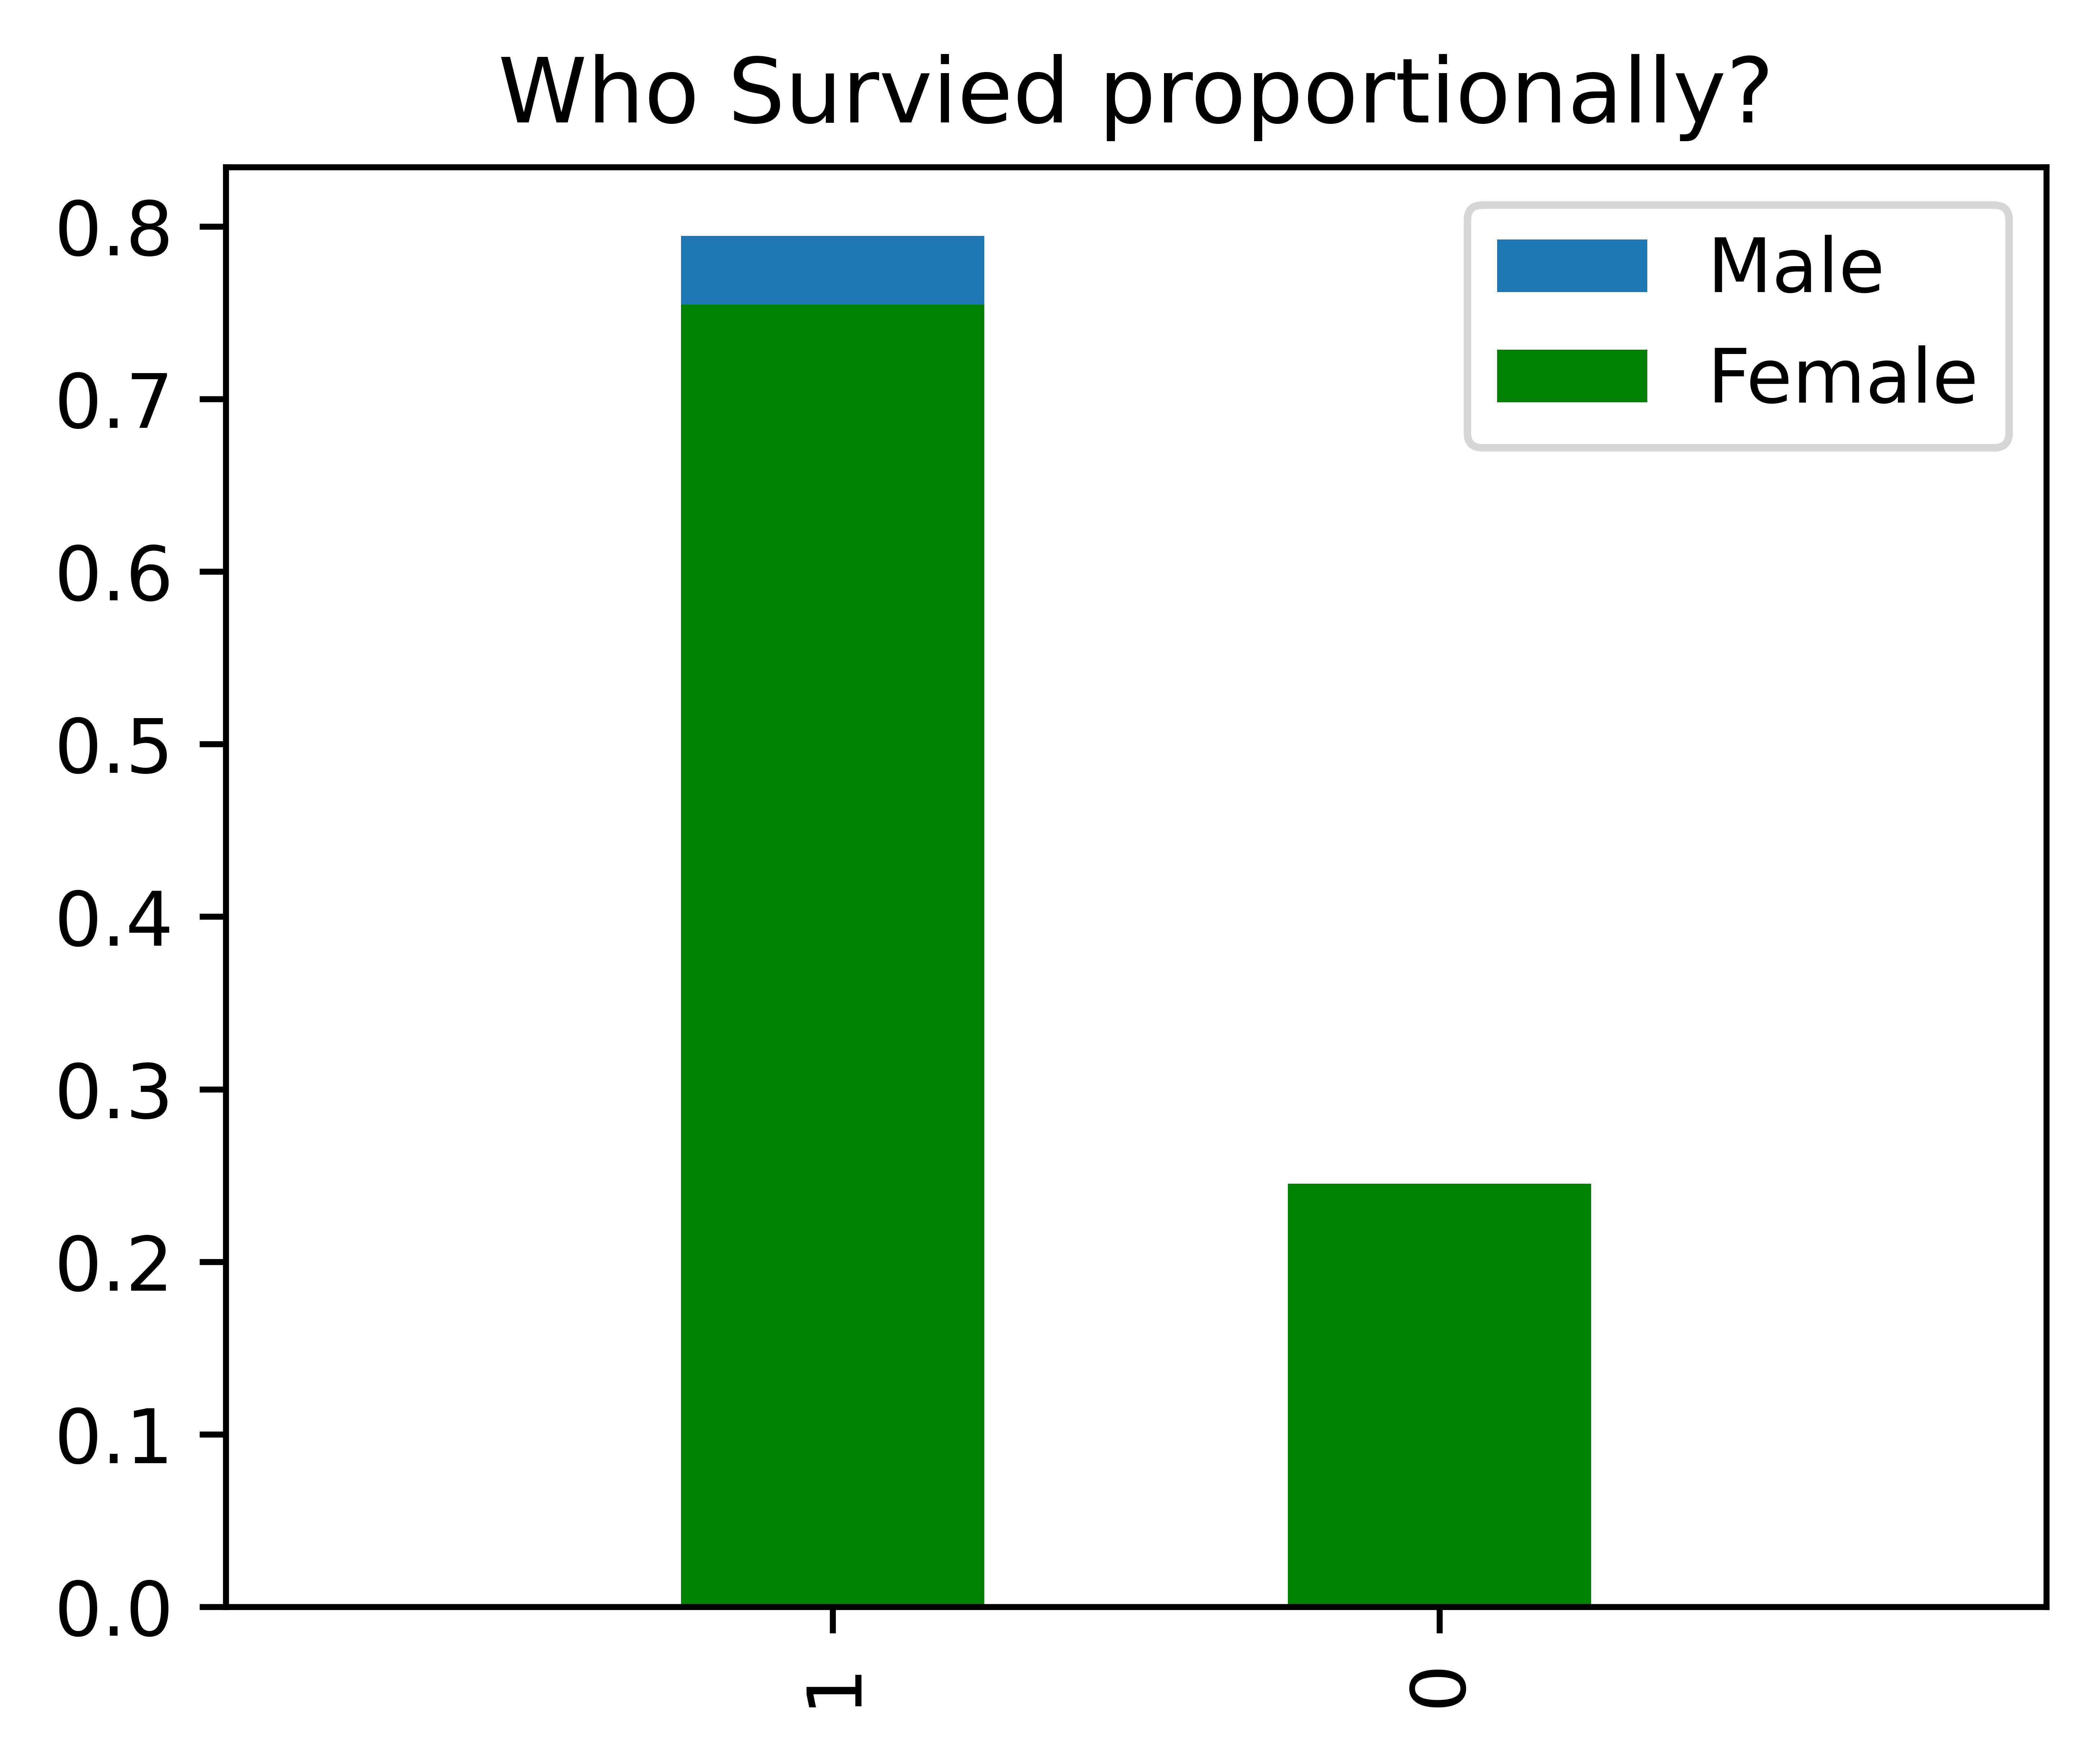

In [16]:

fig = plt.figure(figsize=(20,12), dpi=1500)
a = 0.65

ax3 = fig.add_subplot(346)
(training.Survived[training.Sex == 'male'].value_counts()/float(training.Sex[training.Sex == 'male'].size)).plot(kind='bar',label='Male')
(training.Survived[training.Sex == 'female'].value_counts()/float(training.Sex[training.Sex == 'female'].size)).plot(kind='bar', color='green',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')

In [17]:
training[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Pclass,Survived
0,female,1,0.964706
1,female,2,0.918919
2,female,3,0.460784
3,male,1,0.396040
4,male,2,0.151515
5,male,3,0.150198


In [ ]:

fig = plt.figure(figsize=(20,12), dpi=1500)
a = 0.65

ax3 = fig.add_subplot(349)
female_highclass = training.Survived[training.Sex == 'female'][training.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='magenta', alpha=a)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax4 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = training.Survived[training.Sex == 'female'][training.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='brown', alpha=a)
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = training.Survived[training.Sex == 'male'][training.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='navy', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = training.Survived[training.Sex == 'male'][training.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='lightgreen')
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [ ]:
grid = sns.FacetGrid(training, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
combine

In [ ]:
training.head()

In [ ]:
training['AgeBand'] = pd.cut(training['Age'], 5)
training[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
training = training.drop(['AgeBand'], axis=1)
combine = [training, testing]

In [ ]:
training.head(125)

In [ ]:
X_train = training.drop("Survived", axis=1)
Y_train = training["Survived"]
X_test = testing.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


In [ ]:
coeff_df = pd.DataFrame(training.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
submission = pd.DataFrame({"PassengerId":testing["PassengerId"], "Survived": Y_pred})
submission.to_csv('titaniccompleted.csv', index=False)